In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [4]:
df_train.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
df_train.shape

(550068, 12)

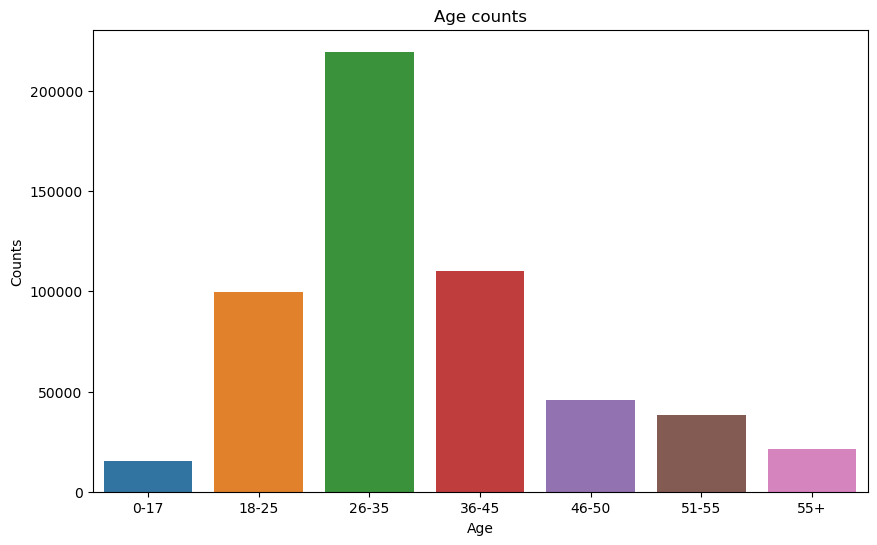

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sorted_age_counts = df_train['Age'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.countplot(x='Age', data=df_train, order=sorted_age_counts.index)
plt.title('Age counts')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

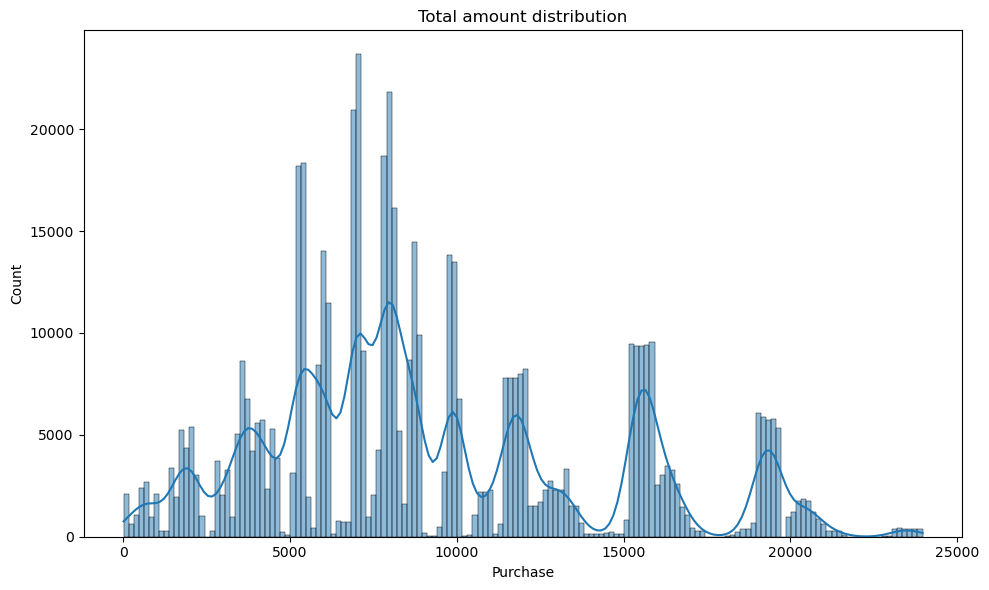

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(df_train['Purchase'], kde=True)

# Set the title and labels for the chart
plt.title('Total amount distribution')
plt.xlabel('Purchase')
plt.ylabel('Count')
plt.tight_layout()

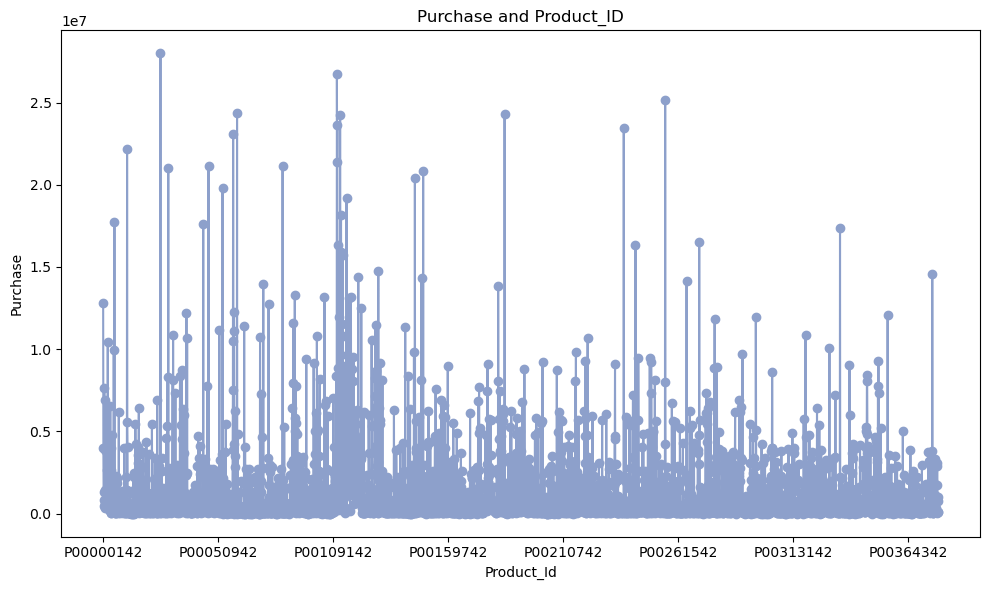

In [11]:
plt.figure(figsize=(10,6))
df_train['Purchase']=pd.to_numeric(
    df_train['Purchase'],errors='coerce')

grouped_data=df_train.groupby('Product_ID')['Purchase'].sum()
grouped_data.plot(kind='line',marker='o',color=sns.color_palette('Set2')[2])

plt.title('Purchase and Product_ID')
plt.xlabel('Product_Id')
plt.ylabel('Purchase')
plt.tight_layout()
plt.show()

In [12]:
df_train['Gender'].value_counts(normalize=True)*100

M    75.310507
F    24.689493
Name: Gender, dtype: float64

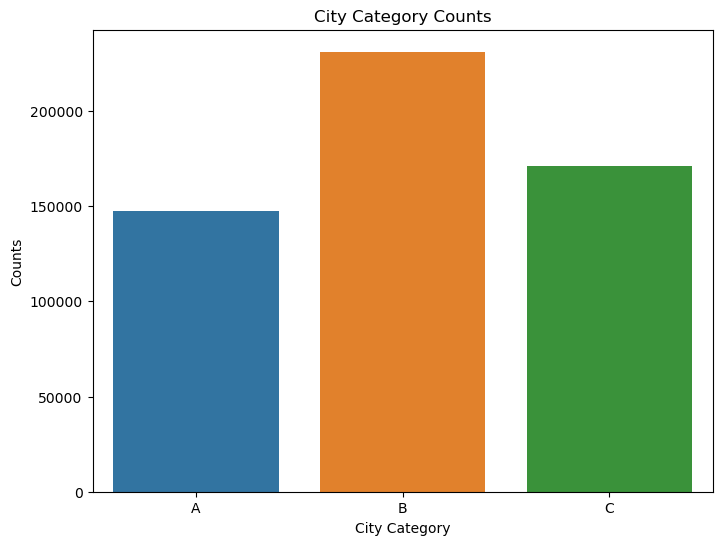

In [13]:
df_train['City_Category'] = df_train['City_Category'].astype('category')

plt.figure(figsize=(8, 6))
sns.countplot(x='City_Category', data=df_train)
plt.title('City Category Counts')
plt.xlabel('City Category')
plt.ylabel('Counts')
plt.show()


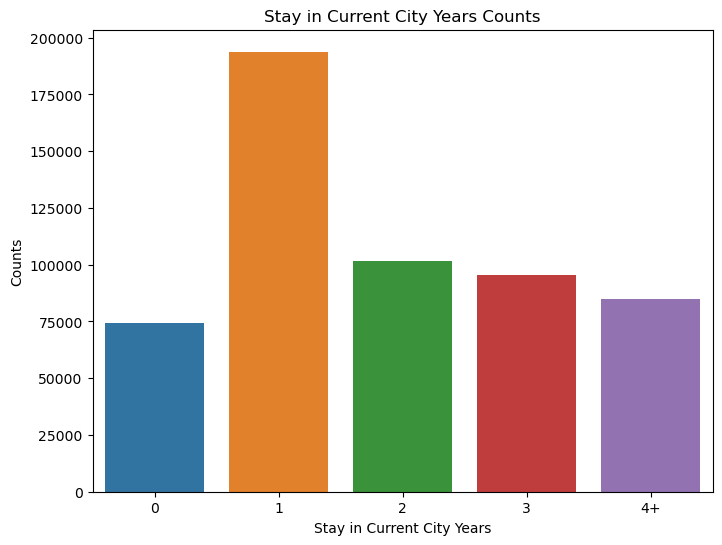

In [14]:
sorted_year_counts = df_train['Stay_In_Current_City_Years'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
sns.countplot(x='Stay_In_Current_City_Years', data=df_train, order=sorted_year_counts.index)
plt.title('Stay in Current City Years Counts')
plt.xlabel('Stay in Current City Years')
plt.ylabel('Counts')
plt.show()

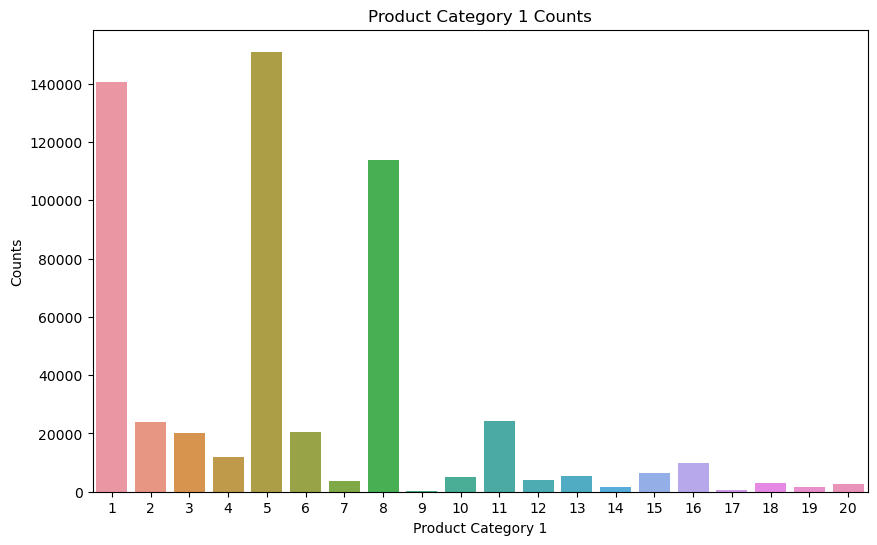

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Product_Category_1', data=df_train)
plt.title('Product Category 1 Counts')
plt.xlabel('Product Category 1')
plt.ylabel('Counts')
plt.show()

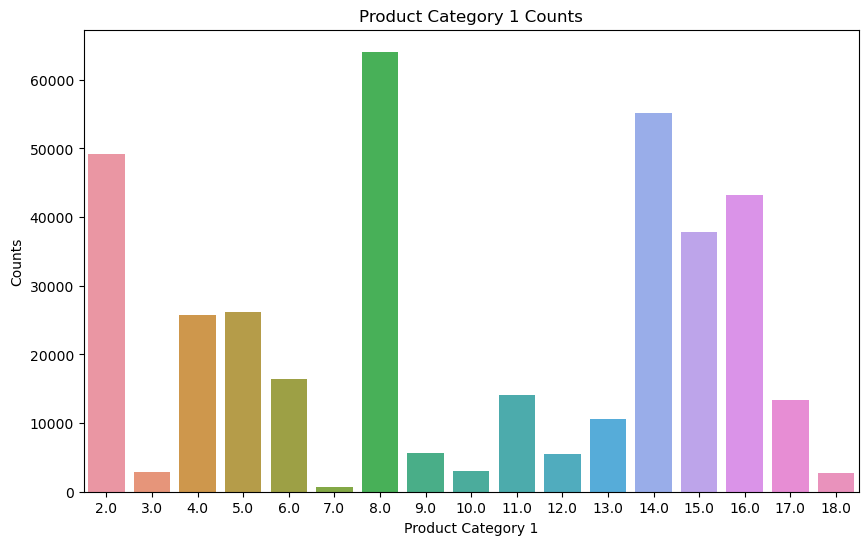

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Product_Category_2', data=df_train)
plt.title('Product Category 1 Counts')
plt.xlabel('Product Category 1')
plt.ylabel('Counts')
plt.show()

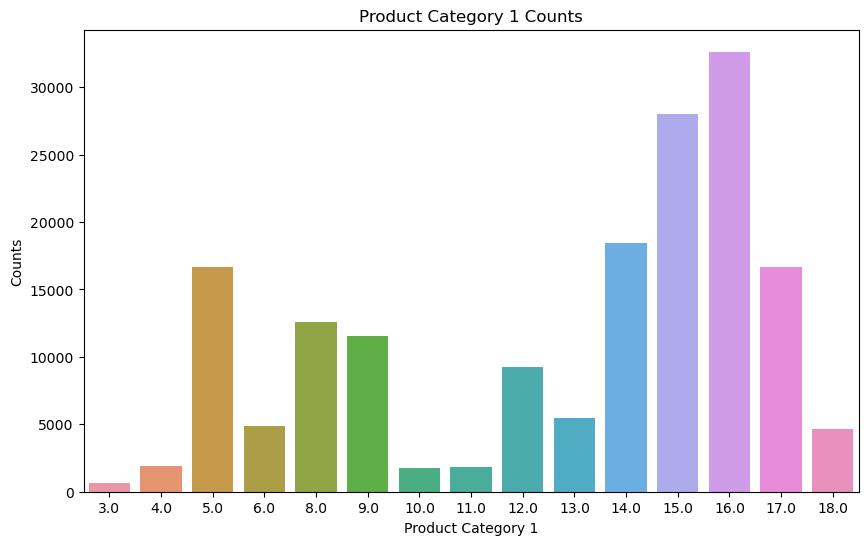

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Product_Category_3', data=df_train)
plt.title('Product Category 1 Counts')
plt.xlabel('Product Category 1')
plt.ylabel('Counts')
plt.show()

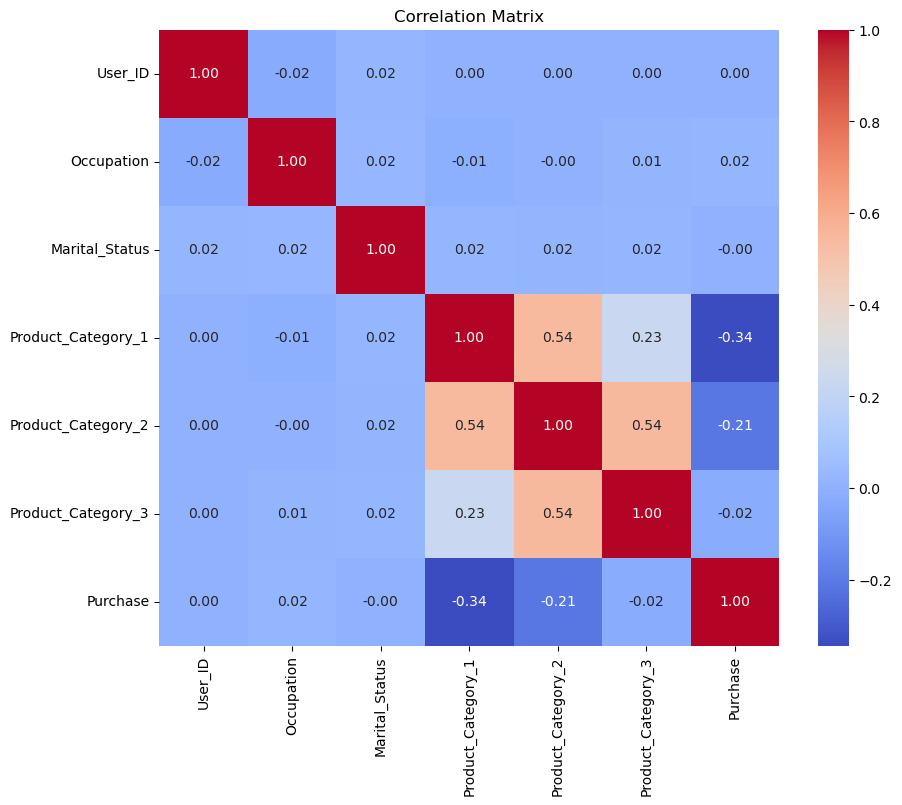

In [18]:
numerical_columns = df_train.select_dtypes(include=[np.number])

correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [19]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [20]:
df=df_train.copy()

In [21]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  object  
 3   Age                         550068 non-null  object  
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  object  
 7   Marital_Status              550068 non-null  int64   
 8   Product_Category_1          550068 non-null  int64   
 9   Product_Category_2          376430 non-null  float64 
 10  Product_Category_3          166821 non-null  float64 
 11  Purchase                    550068 non-null  int64   
dtypes: category(1), float64(2), int64(5), object(4)
memory usa

In [23]:
df = pd.get_dummies(df, columns=['Stay_In_Current_City_Years'])


In [24]:
df_test = pd.get_dummies(df_test, columns=['Stay_In_Current_City_Years'])

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Age'] = le.fit_transform(df['Age'])
df['City_Category'] = le.fit_transform(df['City_Category'])

In [27]:
df['Product_Category_2'] =df['Product_Category_2'].fillna(0).astype('int64')
df['Product_Category_3'] =df['Product_Category_3'].fillna(0).astype('int64')

In [28]:
df_test['Gender'] = le.fit_transform(df_test['Gender'])
df_test['Age'] = le.fit_transform(df_test['Age'])
df_test['City_Category'] = le.fit_transform(df_test['City_Category'])
df_test['Product_Category_2'] =df_test['Product_Category_2'].fillna(0).astype('int64')
df_test['Product_Category_3'] =df_test['Product_Category_3'].fillna(0).astype('int64')

In [29]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,0,0,10,0,0,3,0,0,8370,0,0,1,0,0
1,1000001,P00248942,0,0,10,0,0,1,6,14,15200,0,0,1,0,0
2,1000001,P00087842,0,0,10,0,0,12,0,0,1422,0,0,1,0,0
3,1000001,P00085442,0,0,10,0,0,12,14,0,1057,0,0,1,0,0
4,1000002,P00285442,1,6,16,2,0,8,0,0,7969,0,0,0,0,1


In [30]:
df.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         0
Stay_In_Current_City_Years_0     0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
dtype: int64

In [31]:
df_update = df_test[["User_ID", "Product_ID"]].copy()


In [32]:
df = df.drop(["User_ID","Product_ID"],axis=1)

In [33]:
df_test=df_test.drop(["User_ID","Product_ID"],axis=1)

In [34]:
df.head()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,0,0,10,0,0,3,0,0,8370,0,0,1,0,0
1,0,0,10,0,0,1,6,14,15200,0,0,1,0,0
2,0,0,10,0,0,12,0,0,1422,0,0,1,0,0
3,0,0,10,0,0,12,14,0,1057,0,0,1,0,0
4,1,6,16,2,0,8,0,0,7969,0,0,0,0,1


In [35]:
X = df.drop("Purchase",axis=1)

In [36]:
y=df['Purchase']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
lr.coef_

array([ 465.82318446,  112.36643445,    5.05508596,  314.06766138,
        -58.23217776, -348.4514785 ,   12.98415047,  143.49190467,
        -20.83796687,    5.4676518 ,   17.68367185,   -3.96751734,
          1.65416056])

In [40]:
y_pred=lr.predict(X_test)

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print("mae:", mae)
print("mse:", mse)
print("r2:", r2)

mae: 3532.069226165843
mse: 21397853.26940751
r2: 0.15192944521481688


In [42]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))

RMSE of Linear Regression Model is  4625.781368526566


In [43]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  

In [44]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [45]:
dt_y_pred = regressor.predict(X_test)

In [46]:
mae=mean_absolute_error(y_test, dt_y_pred)
mse=mean_squared_error(y_test, dt_y_pred)
r2=r2_score(y_test, dt_y_pred)
print("mae:", mae)
print("mse:", mse)
print("r2:", r2)

mae: 2372.0357559134654
mse: 11300579.466797074
r2: 0.5521191505924365


In [47]:
from math import sqrt
print("RMSE of Decision Tree Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))

RMSE of Decision Tree Regression Model is  3361.633452177241


In [48]:
from sklearn.ensemble import RandomForestRegressor

RFregressor = RandomForestRegressor(random_state = 0)

In [49]:
RFregressor.fit(X_train, y_train)
rf_y_pred = RFregressor.predict(X_test)

In [50]:
mae=mean_absolute_error(y_test, rf_y_pred)
mse=mean_squared_error(y_test, rf_y_pred)
r2=r2_score(y_test, rf_y_pred)
print("mae:", mae)
print("mse:", mse)
print("r2:", r2)

mae: 2222.049109204734
mse: 9310769.87311957
r2: 0.6309821516972987


In [51]:
from math import sqrt
print("RMSE of RandomForest Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))

RMSE of RandomForest Regression Model is  3051.35541573242


In [52]:
from xgboost.sklearn import XGBRegressor
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.0, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=40, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [53]:
xgb_y_pred = xgb_reg.predict(X_test)

In [54]:
mae=mean_absolute_error(y_test, xgb_y_pred)
mse=mean_squared_error(y_test, xgb_y_pred)
r2=r2_score(y_test, xgb_y_pred)
print("mae:", mae)
print("mse:", mse)
print("r2:", r2)

mae: 2144.8588298827412
mse: 8268802.184348016
r2: 0.67227891659979


In [55]:
from math import sqrt
print("RMSE of XGBoost Regression Model is ",sqrt(mean_squared_error(y_test, xgb_y_pred)))

RMSE of XGBoost Regression Model is  2875.5525007114747


In [56]:
df.shape

(550068, 14)

In [57]:
df_test.shape

(233599, 13)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   Gender                         550068 non-null  int32
 1   Age                            550068 non-null  int32
 2   Occupation                     550068 non-null  int64
 3   City_Category                  550068 non-null  int32
 4   Marital_Status                 550068 non-null  int64
 5   Product_Category_1             550068 non-null  int64
 6   Product_Category_2             550068 non-null  int64
 7   Product_Category_3             550068 non-null  int64
 8   Purchase                       550068 non-null  int64
 9   Stay_In_Current_City_Years_0   550068 non-null  uint8
 10  Stay_In_Current_City_Years_1   550068 non-null  uint8
 11  Stay_In_Current_City_Years_2   550068 non-null  uint8
 12  Stay_In_Current_City_Years_3   550068 non-null  uint8
 13 

In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   Gender                         233599 non-null  int32
 1   Age                            233599 non-null  int32
 2   Occupation                     233599 non-null  int64
 3   City_Category                  233599 non-null  int32
 4   Marital_Status                 233599 non-null  int64
 5   Product_Category_1             233599 non-null  int64
 6   Product_Category_2             233599 non-null  int64
 7   Product_Category_3             233599 non-null  int64
 8   Stay_In_Current_City_Years_0   233599 non-null  uint8
 9   Stay_In_Current_City_Years_1   233599 non-null  uint8
 10  Stay_In_Current_City_Years_2   233599 non-null  uint8
 11  Stay_In_Current_City_Years_3   233599 non-null  uint8
 12  Stay_In_Current_City_Years_4+  233599 non-null  uint8
dtyp

In [60]:
df_test['Purchase']=xgb_reg.predict(df_test)

In [61]:
df_test

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Purchase
0,1,4,7,1,1,1,11,0,0,0,1,0,0,15428.699219
1,1,2,17,2,0,3,5,0,1,0,0,0,0,11141.500000
2,0,3,1,1,1,5,14,0,0,0,0,0,1,6326.891602
3,0,3,1,1,1,4,9,0,0,0,0,0,1,2524.108643
4,0,2,1,2,0,4,5,12,0,1,0,0,0,2181.777832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,0,2,15,1,1,8,0,0,0,0,0,0,1,7127.895508
233595,0,2,15,1,1,5,8,0,0,0,0,0,1,6389.897949
233596,0,2,15,1,1,1,5,12,0,0,0,0,1,13067.276367
233597,0,4,1,2,0,10,16,0,0,0,0,0,1,20714.968750


In [62]:
df_update

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842
...,...,...
233594,1006036,P00118942
233595,1006036,P00254642
233596,1006036,P00031842
233597,1006037,P00124742


In [63]:
print(df_update.isnull().sum())
print(df_test.isnull().sum())

User_ID       0
Product_ID    0
dtype: int64
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Stay_In_Current_City_Years_0     0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
Purchase                         0
dtype: int64


In [64]:
concat_df=pd.concat([df_update,df_test],axis=1)

In [65]:
concat_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Purchase
0,1000004,P00128942,1,4,7,1,1,1,11,0,0,0,1,0,0,15428.699219
1,1000009,P00113442,1,2,17,2,0,3,5,0,1,0,0,0,0,11141.500000
2,1000010,P00288442,0,3,1,1,1,5,14,0,0,0,0,0,1,6326.891602
3,1000010,P00145342,0,3,1,1,1,4,9,0,0,0,0,0,1,2524.108643
4,1000011,P00053842,0,2,1,2,0,4,5,12,0,1,0,0,0,2181.777832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,0,2,15,1,1,8,0,0,0,0,0,0,1,7127.895508
233595,1006036,P00254642,0,2,15,1,1,5,8,0,0,0,0,0,1,6389.897949
233596,1006036,P00031842,0,2,15,1,1,1,5,12,0,0,0,0,1,13067.276367
233597,1006037,P00124742,0,4,1,2,0,10,16,0,0,0,0,0,1,20714.968750


In [66]:
columns_drop=['Gender', 'Age', 'Occupation', 'City_Category','Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3','Stay_In_Current_City_Years_0','Stay_In_Current_City_Years_1',
         'Stay_In_Current_City_Years_2','Stay_In_Current_City_Years_3','Stay_In_Current_City_Years_4+']
concat_df.drop(columns=columns_drop, inplace=True)
concat_df

,User_ID,Product_ID,Purchase
0,1000004,P00128942,15428.699219
1,1000009,P00113442,11141.500000
2,1000010,P00288442,6326.891602
3,1000010,P00145342,2524.108643
4,1000011,P00053842,2181.777832
...,...,...,...
233594,1006036,P00118942,7127.895508
233595,1006036,P00254642,6389.897949
233596,1006036,P00031842,13067.276367
233597,1006037,P00124742,20714.968750


In [67]:
concat_df.to_csv("Result.csv")